# Look ESC-50 data

[ESC-50](https://github.com/karoldvl/ESC-50)

## Settings

In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import librosa
import librosa.display

import IPython.display as ipd

In [2]:
sys.path.append('../src/')

import utils
import preprocess
from visualize import visualize_spectrogram

In [3]:
data_dir = Path().cwd().parent/'data'
raw_data_dir = data_dir/'external'/'ESC-50'
processed_data_dir = data_dir/'processed'/'ESC-50'

In [4]:
metadata_path = raw_data_dir/'meta'/'esc50.csv'
audio_dir = raw_data_dir/'audio'
spectrogram_dir = processed_data_dir/'spectrogram'

## Load Metadata

In [5]:
metadata = pd.read_csv(str(metadata_path))

In [6]:
metadata

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [7]:
n_data = len(metadata)
print('#Data: {}'.format(n_data))

#Data: 2000


In [8]:
label_data = metadata.loc[:, ['target', 'category']].drop_duplicates()
label_data = label_data.sort_values(by=['target'], ascending=True)
label_data = label_data.reset_index(drop=True)
#label_data

In [9]:
label_data['number'] = 0
for i, target in enumerate(label_data['target']):
    label_data.loc[i, 'number'] = len(metadata.query('target == @target'))
label_data

,target,category,number
0,0,dog,40
1,1,rooster,40
2,2,pig,40
3,3,cow,40
4,4,frog,40
5,5,cat,40
6,6,hen,40
7,7,insects,40
8,8,sheep,40
9,9,crow,40


## Load

In [10]:
idx = 5

In [11]:
data = metadata.iloc[idx, :]

In [12]:
data

filename    1-101296-B-19.wav
fold                        1
target                     19
category         thunderstorm
esc10                   False
src_file               101296
take                        B
Name: 5, dtype: object

In [13]:
fpath = audio_dir/data['filename']

In [14]:
x, fs = librosa.load(str(fpath))

In [15]:
x.shape

(110250,)

In [16]:
fs

22050

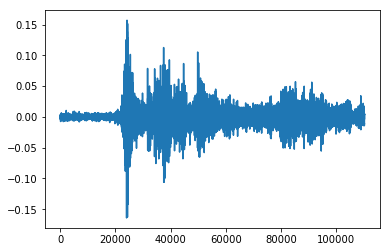

In [17]:
plt.plot(x)
plt.show()

In [18]:
ipd.Audio(x, rate=fs)

## Spectrogram

In [19]:
sp = preprocess.spectrogram(x)
sp.shape

(257, 431)

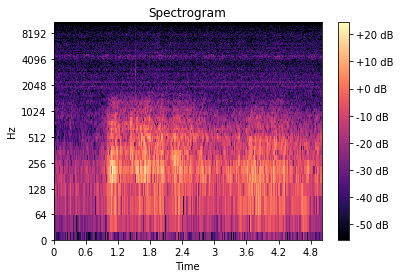

In [20]:
visualize_spectrogram(sp, fs, hop_length=256, mel=False)

## Mel Spectrogram

In [21]:
melsp = preprocess.mel_spectrogram(x)
melsp.shape

(128, 862)

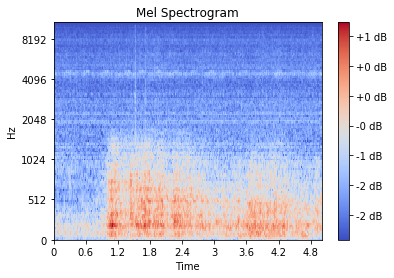

In [22]:
visualize_spectrogram(melsp, fs, mel=True)

## Data Augmantation

## train/valid/test split

In [23]:
train_metadata_path = processed_data_dir/'metadata_train.csv'
valid_metadata_path = processed_data_dir/'metadata_valid.csv'
test_metadata_path = processed_data_dir/'metadata_test.csv'

In [24]:
metadata

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


In [25]:
label_data

,target,category,number
0,0,dog,40
1,1,rooster,40
2,2,pig,40
3,3,cow,40
4,4,frog,40
5,5,cat,40
6,6,hen,40
7,7,insects,40
8,8,sheep,40
9,9,crow,40


In [26]:
labels = label_data['target'].values
n_label = len(labels)
label_indices_shuffled = np.random.permutation(range(n_label))

### Test data

only unknown label data

In [27]:
n_test_label = 5

In [28]:
test_label_indices = label_indices_shuffled[:n_test_label]
test_labels = labels[test_label_indices]
test_labels

array([15, 34, 29, 12, 20], dtype=int64)

In [29]:
test_indices = []
for label in test_labels:
    test_indices.extend(metadata.query('target == @label').index.values.tolist())
test_metadata = metadata.loc[test_indices, :]
test_metadata.to_csv(str(test_metadata_path), index=False, encoding='utf-8')
#test_metadata

### Valid data

unknown label data + known label data

In [30]:
n_only_valid_label = 2
n_known_label_data = 120

In [31]:
valid_label_indices = label_indices_shuffled[n_test_label:n_test_label+n_only_valid_label]
valid_labels = labels[valid_label_indices]
valid_labels

array([19,  1], dtype=int64)

In [32]:
valid_only_indices = []
for label in valid_labels:
    valid_only_indices.extend(metadata.query('target == @label').index.values.tolist())

In [33]:
indices_all = metadata.index.values.tolist()
indices_left = list(set(indices_all) - set(valid_only_indices) - set(test_indices))

In [34]:
_indices = np.random.permutation(range(len(indices_left)))[:n_known_label_data]
valid_known_indices = np.array(indices_left)[_indices].tolist()

In [35]:
valid_indices = valid_only_indices + valid_known_indices

In [36]:
valid_metadata = metadata.loc[valid_indices, :]
valid_metadata.to_csv(str(valid_metadata_path), index=False, encoding='utf-8')
#valid_metadata

### Train data

In [37]:
train_metadata = metadata.drop(test_indices, axis=0).drop(valid_indices, axis=0)
train_metadata.to_csv(str(train_metadata_path), index=False, encoding='utf-8')
#train_metadata